In [1]:
# coding: utf-8
import numpy as np
from matplotlib import pyplot as plt
def orto(x):
    if np.dot(x,x) == 0:
        return 'No se puede: ese es el vector cero!'
    else:
        if 0 not in x:
            v1 = 1
            v2 = -(x[0]/x[1])
            v3 = 0
            #return np.array([v1,v2,v3])
        else:
            if x[0] == 0:
                if x[1] == 0:
                    v1 = 1
                    v2 = 0
                    v3 = 0
                else:
                    v1 = 0
                    v2 = 0
                    v3 = 1
            elif x[1] == 0:
                v1 = 0
                v2 = 1
                v3 = 0
            else:
                v1 = 0
                v2 = 0
                v3 = 1
        return np.array([v1,v2,v3])
    
#Funcion que regresa dos vectores; numpy arrays de 3D, ortogonales al vector de input x.
#Esto es, devuelven la base al espacio ortogonal definido por el vector x de entrada.
#@jit
def base_ort_nor(x):
    y = orto(x)
    v1 = y/np.linalg.norm(y)
    z = np.cross(x,v1)
    v2 = z/np.linalg.norm(z)
    return v1, v2


#Esta funcion genera un vector con distrubucion uniforme en las direcciones sobre un plano tangente a la esfera de radio R.
#@jit
def vector_des(v1,v2):
    na = 2*np.pi*np.random.rand()
    vn = v1*np.cos(na) + v2*np.sin(na)
    return vn/np.linalg.norm(vn)

R = 1

#Normalizamos al vector de desplazamiento para que intersecte al vector de la nueva posicion de acuerdo con que el
#desplazamiento (s) sobre la esfera, sobre este arco de circulo maximo, sea el determinado por el movimiento browniano particular.
#@jit



#REVISAR SI ES NECESARIO CAMBIAR ESTO CUANDO HAY UN CAMPO EXTERNO; AL FINAL REESCALAR CON UNA TANGENTE


def vector_q(x,s):
    q = (R)*np.tan(s/(R))
    return q*x

#Dados todos los datos anteriores, esta funcion actualiza la posicion de la particula.
#Lo que hace es que la mueve sobre el plano tangente a la esfera en la direccion predeterminada de tal suerte que el desplazamiento efectivo
#s sobre una geodesica de la esfera, se el deseado, y posteriormente la proyecta sobre la superficie de la esfera.
#@jit
def nuevo_r(r, vector_q):
    y = r + vector_q
    y = y/np.linalg.norm(y)
    return (R)*y

#funcion que incorpora el efecto de un campo externo



#Esta funcion ensambla todo lo anterior: como imput necesita una posicion inicial y un arco de desplazamiento
#Como output da un vector de posicion nuevo dada un tipo de desplazamiento.
#@jit
def actualiza(r,s):
    v1, v2 = base_ort_nor(r)
    pre_q = vector_des(v1,v2)
    q = vector_q(pre_q, s)
    return nuevo_r(r, q)




#Esta funcion actualiza la posicion de todos los elementos de una lista; particula brownianas.
#@jit
def act_n(lista,s):
    l = []
    for v in lista:
        s = ese(D,delta_t)
        l.append(actualiza(v,s))
    return l





#Huella de la trayectoria
#La siguiente funcion hace una particion de la trayectoria sobre s en n pedazos y regresa
#una lista de los vectores de esas posiciones sobre la esfera.
#Usa al operador de rotacion.

#@jit
def b_steps_(ri,rf,n):
    l = [ri]
    r0 = ri
    lamb = (np.dot(ri,rf))/((np.linalg.norm(ri))*(np.linalg.norm(rf)))
    
    if abs(lamb) > 1:
        #print 'Is fucked up: there was a rounding '
        if lamb < 0:
            lamb = -1
        else:
            lamb = 1
    
    
    
    theta = np.arccos(lamb)
    #if theta < 1e17:
        #return l
    if theta == 0:
        return [ri,rf]
    
    else:

        normal = np.cross(ri, rf)/ np.linalg.norm(np.cross(ri,rf))
        for i in range(1,n + 1):
            #vi = rot_theta(r0, theta/n, normal)
            vi = rot_finita(r0, -normal, theta/n)
            l.append(vi)
            r0 = vi
        return l


#Operador de Rotacion
#Depende de los parametros r, el vector o punto que queremos rotar; theta el angulo de rotacion; n el vector que define el eje de rotacion y el signo de rotacion.


#@jit
def rot_theta(r, theta, u):
    x = np.array([np.cos(theta) + (u[0]*u[0])*(1 - np.cos(theta)), u[0]*u[1]*(1 - np.cos(theta)) - u[2]*np.sin(theta), u[0]*u[2]*(1 - np.cos(theta)) + u[1]*np.sin(theta)])
    y = np.array([u[1]*u[0]*(1 - np.cos(theta)) + u[2]*np.sin(theta), np.cos(theta) + u[1]*u[1]*(1 - np.cos(theta)), u[1]*u[2]*(1 - np.cos(theta)) - u[0]*np.sin(theta)])
    z = np.array([u[2]*u[0]*(1 - np.cos(theta)) - u[1]*np.sin(theta), u[2]*u[1]*(1 - np.cos(theta)) + u[0]*np.sin(theta), np.cos(theta) + u[2]*u[2]*(1 - np.cos(theta))])
    R = np.array([x,y,z])
    return np.dot(R, r)



#Transformacion de coordenada de esfericas a cartesianas.

#@jit
def trans_s_c(r,theta, phi):
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)* np.sin(phi)
    z = r*np.cos(theta)
    return x, y, z



def trans_c_s(x,y,z):
    r = np.sqrt(x**2 + y**2 + z**2)
    #print r
    cociente = z/r
    if abs(cociente) > 1:
        if cociente < 0:
            theta = np.arccos(-1)
        else:
            theta = np.arccos(1)
    else:
        
        theta = np.arccos(z/r)
    #Aqui hay un problema relevante: cada vez que y o x sean nulos, habra un problema
    #de indefinicion de operacion
    if x == 0.:
        if y == 0.:
            phi = 2*np.pi*np.random.rand()
    else:
        if x < 0:
            phi = np.arctan(y/x) + np.pi
        else:
            if y < 0:
                phi = np.arctan(y/x) + 2*np.pi
            else:
                
                phi = np.arctan(y/x)
    return r, theta, phi




#Base unitaria para las coordenadas esféricas
#@jit
def r_uni(theta, phi):
    x = np.sin(theta)*np.cos(phi)
    y = np.cos(theta)*np.cos(phi)
    z = np.cos(theta)
    return np.array([x,y,z])
#@jit
def theta_uni(theta, phi):
    x = np.cos(theta)*np.cos(phi)
    y = np.cos(theta)*np.sin(phi)
    z = -np.sin(theta)
    return np.array([x,y,z])
#@jit
def phi_uni(theta, phi):
    x = -np.sin(phi)
    y = np.cos(phi)
    z = 0
    return np.array([x,y,z])

#Función que normaliza los nombres para las animaciones de tal suerte que tenga el mismo número de
#digitos y se iteren en orden
#@jit
def nombre(s):
    diferencia = 4 - len(str(s))
    ceros = '' 
    for i in range(diferencia):
        ceros = ceros + '0'
    variable = ceros + str(s)
    return variable

#Varianza para una distribucion bigaussiana; difusion en 2D
#@jit
def var(D, delta_t):
    return 4*D*delta_t


#Arco de circulo maximo con distribucion normal alrededor de cero y una varianza dada por
#@jit
def ese(D,delta_t):
    return abs(np.random.normal(loc = 0., scale = np.sqrt(var(D,delta_t)),size = None))

#Funcion de rotacion finita
#@jit
def rot_finita(r_ini, N, Phi):
    n = N/np.linalg.norm(N)
    r_fin = np.cos(Phi)*r_ini + (np.dot(n,r_ini))*(1 - np.cos(Phi))*n + (np.sin(Phi))*(np.cross(r_ini,n))
    return r_fin


#Funcion que regresa una lista de n numpy arrays que son l
def Trayectoria(ri,rf,n):
    l = [ri]
    r0 = ri
    theta = np.arccos((np.dot(ri,rf))/((np.linalg.norm(ri))*(np.linalg.norm(rf))))
    N = np.cross(ri, rf)
    
    for i in range(1,n + 1):
        vi = rot_finita(r0, N, theta/n)
        l.append(vi)
        r0 = vi
    return l

#Collision_check es una función que, dada una trayectoria: una lista de vectores que
#pasan por puntos sucesivos de la trayectoria, verifica si alguna de estas posiciones
#interesecto a alguno de los obstáculos. En caso de que así sea, actualiza conforme una
#colision elastica. En caso de no intersectar a ningun obstaculo regresa una lista
#con dos vectores: posicion inicial y posicion final en ese orden.
#@jit
def penetrate_obs(lista_vect, lista_obs, size):
    metiches = []
    for obs in lista_obs:
        theta_omega = size
        r_omega = obs
        frontera = .2
        #metiches = []
        for v in lista_vect:
            tamanho = np.cos(theta_omega - frontera)
            if np.dot(v,r_omega) > tamanho:
                print('Penetro el mother fucker obstacle')
                metiches.append(v)
                
            else:
                continue
    #print 'no choco el mother fucker'
    #valor = False
    return metiches


#Esta funcion cuando es llamada grafia la posicion de las partoculas brownianas.
#sobre la superficie de una esfera sobre la que se esta difundiendo.
#@jit
def plot_particles(lista, vpolar, vazim, numero):
    from mpl_toolkits.mplot3d import axes3d
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm

    #import matplotlib.pyplot as plt
    #import numpy as np
    from itertools import product, combinations
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    ax._axis3don = False

    



    #draw sphere
    R = 1
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x=R*np.cos(u)*np.sin(v)
    y=R*np.sin(u)*np.sin(v)
    z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.15)

    ax.plot_surface(x, y, z, cmap=cm.YlGnBu_r,rstride=1, cstride=1, alpha = 0.10, linewidth = 0.10)
    ax.view_init(vpolar, vazim)
    
    
    #draw an arrow or a set of arrow
    #ax.quiver(0,0,1.5,0,0,1, length=0.5, arrow_length_ratio = .5, color = "b")
    #ax.quiver(1.5,0,0,1,0,0, length=0.5, arrow_length_ratio = .5, color ="g")
    #ax.quiver(0,1.5,0,0,1,0, length=0.5, arrow_length_ratio = .5, color ="r")
    #draw patch
    #u, v = np.mgrid[0:2*np.pi:50j, 0:(np.pi/7):50j]
    #x=R*np.cos(u)*np.sin(v)
    #y=R*np.sin(u)*np.sin(v)
    #z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.25)    
    
    #draw points
    for p in lista:
        ax.scatter([p[0]],[p[1]],[p[2]],color="b",s=15, alpha = 0.25)
    
    fig.savefig('SHY20_Field_X01_Img{}.png'.format(nombre(numero)))
    #ax.view_init(80, 30)
    #plt.show()
    plt.close()

    
    
#@jit
def polo_n(n, R):
    l = []
    for i in range(n):
        l.append(np.array([0,0,R]))
    return l

#@jit
def particion_esfera(ccero, Nphi):
    Ntheta = int(4*np.pi/(ccero*Nphi))
    print('Ntheta', Ntheta, 'Nphi', Nphi, 'Ntheta*Nphi', Ntheta*Nphi)
    sigmaPhi = 2*np.pi/Nphi
    deltaphi = 2*np.pi/Nphi
    thetas = []
    phis = [0]
    cociente = ccero/sigmaPhi
    for i in range(Ntheta + 1):
        theta = np.arccos(1 - (i)*cociente)
        thetas.append(theta)
    for j in range(Nphi):
        phis.append(phis[j] + deltaphi)
    return thetas, phis

#@jit
def secuencia_part(tamini, Nfi, numero):
    l1, l2 = particion_esfera(4*np.pi/tamini, Nfi)
    particion = []
    for i in range(len(l2)):
        for j in range(len(l1)):
            x, y, z = trans_s_c(1, l1[j], l2[i])
            particion.append(np.array([x, y, z]))
            
    return plot_particles(particion, 45, 45, numero)

#Funcion que regresa las coordenadas del centro de dos arreglos para 
#las coordenadas theta y phi
#@jit
def coordenadas_centro(l1,l2):
    thetas_centro = []
    phis_centro = []
    for i in range(len(l1) - 1):
        theta_media = l1[i] + (l1[i + 1] - l1[i])/2.
        thetas_centro.append(theta_media)
    for j in range(len(l2) - 1):
        phi_media = l2[j] + (l2[j + 1] - l2[j])/2.
        phis_centro.append(phi_media)
    return thetas_centro, phis_centro

#@jit(nopython=True)
def secuencia_obs(N, Nfi, numero):
    l1_prima, l2_prima = particion_esfera(4*np.pi/N, Nfi)
    l1, l2 = coordenadas_centro(l1_prima, l2_prima)
    particion = []
    for i in range(len(l2)):
        for j in range(len(l1)):
            x, y, z = trans_s_c(1, l1[j], l2[i])
            particion.append(np.array([x, y, z]))
            
    print(len(particion))
    
    #return plot_particles(particion, 0, 0, numero)
    return particion


def plot_particle_traj_obs(lista_obstaculos, trayectoria,  vpolar, vazim, numero):
    from mpl_toolkits.mplot3d import axes3d
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm

    #import matplotlib.pyplot as plt
    #import numpy as np
    from itertools import product, combinations
    fig = plt.figure(figsize=(20,10))
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")
    ax._axis3don = False
    

    



    #draw sphere
    R = 1
    u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:50j]
    x=R*np.cos(u)*np.sin(v)
    y=R*np.sin(u)*np.sin(v)
    z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.15)

    ax.plot_surface(x, y, z, cmap=cm.YlGnBu_r,rstride=1, cstride=1, alpha = 0.10, linewidth = 0.15)
    ax.view_init(vpolar, vazim)
    #draw patch
    #u, v = np.mgrid[0:2*np.pi:50j, 0:(np.pi/7):50j]
    #x=R*np.cos(u)*np.sin(v)
    #y=R*np.sin(u)*np.sin(v)
    #z=R*np.cos(v)
    #ax.plot_surface(x, y, z, color="r", alpha = 0.25)
    
    
    
    #draw obstacles
    
    for p in lista_obstaculos:
        ax.scatter([p[0]],[p[1]],[p[2]], color="b", s=10, alpha = 0.2)
    
    #draw trajectory
    for p in trayectoria:
        ax.scatter([p[0]],[p[1]],[p[2]], color="k",s=20, alpha = 0.7)
    
    #Plot the x positive direction
    
    ax.quiver(1.5,0,0,1,0,0, length=0.5, arrow_length_ratio = .5)
    ax.quiver(0,1.5,0,0,1,0, length=0.5, arrow_length_ratio = .5)
    ax.quiver(0,0,1.5,0,0,1, length=0.5, arrow_length_ratio = .5)
    
    #fig.savefig('BS_24_Obs_test_01{}.png'.format(nombre(numero + 1)))
    #ax.view_init(80, 30)
    #plt.close()
    plt.show()

def obs_uniforme(N, R, size):
    
    list_obs = []
    omega = np.cos(size)
    while len(list_obs) < N:
        x, y, z = np.random.uniform(-1,1), np.random.uniform(-1,1), np.random.uniform(-1,1)
        v = np.array([x, y, z])
        norma = np.linalg.norm(v)
        if norma <= R:
            n = v/norma
            if not np.dot(n, np.array([0.,0.,1.]))/R > omega:
                list_obs.append(R*n)
    
    return list_obs    


def puntos_obs_j(r_omega, theta_omega, n):
    r , theta, phi = trans_c_s(r_omega[0],r_omega[1],r_omega[2])
    rp = rot_finita(r_omega, phi_uni(theta, phi), theta_omega)
    puntos_obs_j = [rp]
    for i in range(1,n):
        x = rot_finita(rp, r_omega, 2*np.pi/n)
        puntos_obs_j.append(x)
        rp = x
    return puntos_obs_j



def puntos_obs(lista_obstaculos, size):
    mis_obs = []
    for i in range(len(lista_obstaculos)):
        a = lista_obstaculos[i]
        b = size
        mis_obs = mis_obs + puntos_obs_j(a,b,100)
    return mis_obs
#Collision_check es una función que, dada una trayectoria: una lista de vectores que
#pasan por puntos sucesivos de la trayectoria, verifica si alguna de estas posiciones
#interesecto a alguno de los obstáculos. En caso de que así sea, actualiza conforme una
#colision elastica. En caso de no intersectar a ningun obstaculo regresa una lista
#con dos vectores: posicion inicial y posicion final en ese orden.

def penetrate_obs(lista_vect, lista_obs, size):
    metiches = []
    for obs in lista_obs:
        r_omega, theta_omega = obs, size
        #frontera = .2
        #metiches = []
        for v in lista_vect:
            tamanho = np.cos(theta_omega)
            if np.dot(v,r_omega) >= tamanho:
                #print 'Penetro el mother fucker obstacle'
                metiches.append(v)
                
            else:
                continue
    #print 'no choco el mother fucker'
    #valor = False
    return metiches
    

def check_collision(lista_vect, lista_obs, size):
    for obs in lista_obs:
        r_omega, theta_omega = obs, size 
        for v in lista_vect:
            tamanho = np.cos(theta_omega)
            if np.dot(v,r_omega) > tamanho:
                return  True
            else:
                continue
    return False


#REVISAR SI HAY QUE MODIFICAR Y REESCALAR DESPUES CON UNA TANGENTE, NO CADA TERMINO COMO ESTE DE ABAJO:

def vector_q(x,s):
    q = np.tan(s)
    return q*x

#Distribución en el polo sur

def polo_s(n, R):
    l = []
    for i in range(n):
        l.append(np.array([0,0,-R]))
    return l

#Dsitribución en el ecuador

def dist_ecuador(n):
    l = []
    for i in range(n):
        x, y, z = trans_s_c(1.,np.pi/2, np.random.uniform(0,2*np.pi))
        l.append(np.array([x,y,z]))
    return l



In [2]:
#def nuevo_r_field(r, vector_q, field):
#    #nfield = np.tan(field)
#    xf = np.linalg.norm(field)
#    if xf == 0:
#        nfield = 0
#    else:
#        fvecuni = field/xf
#        nfield = np.tan(xf)*fvecuni
#    #y = r + vector_q + nfield
#    y = r + vector_q + nfield
#    y = y/np.linalg.norm(y)
#    return y



def nuevo_r_field(r, vector_q, field):
    #nfield = np.tan(field)
    v_sum = field + vector_q
    xf = np.linalg.norm(v_sum)
    if xf == 0:
        nfield = 0
    else:
        fvecuni = (v_sum)/xf
        nfield = np.tan(xf)*fvecuni
    #y = r + vector_q + nfield
    y = r + nfield
    y = y/np.linalg.norm(y)
    return y



coff = np.sqrt((5./(16*np.pi)))

def field_theta(ri, v0):
    r, theta, phi = trans_c_s(ri[0],ri[1],ri[2])
    
    theta_field = coff*(-6*np.cos(theta)*np.sin(theta))
    
    phi_field = 0.
    
    field = v0*(theta_field)*theta_uni(theta, phi)
    
    return field

def actualiza_field_theta(r,s,v0):
    v1, v2 = base_ort_nor(r)
    pre_q = vector_des(v1,v2)
    q = vector_q(pre_q, s)
    return nuevo_r_field(r, q, field_theta(r,v0))
    #return nuevo_r_field(r, pre_q, field_theta(r,v0))


def act_n_field(lista, v0):
    l = []
    for v in lista:
        s = ese(D,dt)
        l.append(actualiza_field_theta(v, s, v0))
    return l


In [3]:
def mean_var_hist_theta(lista):
    thetas = []
    for r in lista:
        cociente = r[2]
        if abs(cociente) > 1.:
            if cociente < 0:
                theta = np.arccos(-1)
            else:
                theta = np.arccos(1)
        else:

            theta = np.arccos(r[2])
            
        thetas.append(theta)
        
    return thetas, np.mean(thetas), np.var(thetas)

In [4]:
def mean_var_hist_phis(lista):
    phis = []
    for r in lista:
        
        if r[0] == 0:
            if r[1] == 0:
                phi = 2*np.pi*np.random.rand()
        else:
            if r[0] < 0:
                
                phi = np.arctan(r[1]/r[0]) + np.pi
                    
            else:
                if r[1] < 0:
                    phi = np.arctan(r[1]/r[0]) + 2*np.pi
                else:
                
                    phi = np.arctan(r[1]/r[0])
                
        phis.append(phi)
    return phis, np.mean(phis), np.var(phis)

In [5]:
from __future__ import division
import scipy as sci
import scipy.special as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors

In [6]:
def Plot_Spherical_lm(l,m, numero,t,vp,va):
    
    PHI, THETA = np.mgrid[0:2*np.pi:200j, 0:np.pi:200j]
    R = sp.sph_harm(m, l, PHI, THETA).real
    R = np.abs(R*np.cos(2*t))
    X = R * np.sin(THETA) * np.cos(PHI)
    Y = R * np.sin(THETA) * np.sin(PHI)
    Z = R * np.cos(THETA)

    #As R has negative values, we'll use an instance of Normalize
    #see http://stackoverflow.com/questions/25023075/normalizing-colormap-used-by-facecolors-in-matplotlib
    norm = colors.Normalize()
    plt.rc("text", usetex = True)
    fig, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(14,10))
    m = cm.ScalarMappable(cmap=cm.jet)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=cm.jet(norm(R)), alpha = 0.5)
    ax.set_title(r'$ |Y_{l}^{m}(\theta, \phi)| $', fontsize=24)
    #ax.set_xlim(-0.5,0.5)
    #ax.set_ylim(-0.5,0.5)
    #ax.set_zlim(-0.5,0.5)
    m.set_array(R)
    ax.view_init(vp,va)
    fig.colorbar(m, shrink=0.8)
    #plt.savefig("SphericalHarmonicY22_{}".format(nombre(numero)))
    #plt.close();

In [10]:
%matplotlib inline

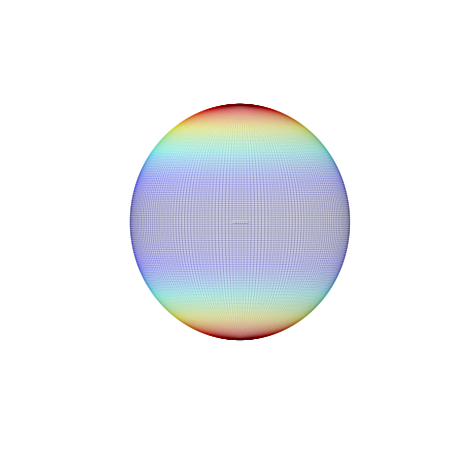

In [11]:
phi_sh = np.linspace(0, np.pi, 200)
theta_sh = np.linspace(0, 2*np.pi, 200)
phi_sh, theta_sh = np.meshgrid(phi_sh, theta_sh)

# The Cartesian coordinates of the unit sphere
x_sh = np.sin(phi_sh) * np.cos(theta_sh)
y_sh = np.sin(phi_sh) * np.sin(theta_sh)
z_sh = np.cos(phi_sh)

l, m = 2, 0

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sp.sph_harm(m, l, theta_sh, phi_sh).real
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
#fig = plt.figure(figsize=plt.figaspect(1.))
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sh, y_sh, z_sh,  rstride=1, cstride=1, facecolors=cm.jet(fcolors), alpha = 0.06)
# Turn off the axis planes
ax.set_axis_off()
ax.view_init(0,0)
plt.show()

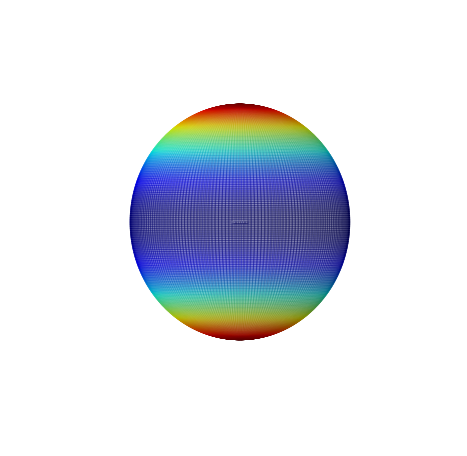

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sh, y_sh, z_sh,  rstride=1, cstride=1, facecolors=cm.jet(fcolors), alpha = 0.2)
# Turn off the axis planes
ax.set_axis_off()
ax.view_init(0,0)
plt.show()

### Administración de carpetas

In [7]:
!pwd

/Users/adrianovaldesgomez/Documents/Adriano_Programming


In [16]:
%cd ..

/Users/draflorencia/Documents/Adriano/simulaciones/New_Programs/Foreign_Notebooks


In [8]:
!mkdir SH_Sim_Y20_0X

In [9]:
%cd SH_Sim_Y20_0X/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/SH_Sim_Y20_0X


### Simulación

In [10]:
D = 1e-1
dt = np.log(2)*1e-3
v0 = 20*np.sqrt(2*D)*dt
dist_uni = obs_uniforme(700, 1., 0)
#dist_uni = polo_n(600,1.)
plot_particles(dist_uni, 0, 0, 0)
rs = dist_uni
for i in range(700):
         
        nuevas_pos = act_n_field(rs, v0)
        plot_particles(nuevas_pos, 0, 0, i + 1)
        rs = nuevas_pos

### Animación

In [12]:
!mencoder "mf://*.png" -o SHY20_Animation_01.avi -ovc lavc -lavcopts vcodec=msmpeg4v2:autoaspect:vbitrate=2160000:mbd=2:keyint=132:vqblur=1.0:cmp=2:subcmp=2:dia=2:o=mpv_flags=+mv0:last_pred=3 -fps 20;



MEncoder 1.3.0-4.2.1 (C) 2000-2016 MPlayer Team
224 audio & 451 video codecs
success: format: 16  data: 0x0 - 0x0
MF file format detected.
[mf] search expr: *.png
[mf] number of files: 701 (5608)
[demux_mf] file type was not set! trying 'type=png'...
VIDEO:  [MPNG]  0x0  24bpp  25.000 fps    0.0 kbps ( 0.0 kbyte/s)
[V] filefmt:16  fourcc:0x474E504D  size:0x0  fps:25.000  ftime:=0.0400
Input fps will be interpreted as 20.000 instead.
libavcodec version 57.24.102 (internal)
Opening video filter: [expand osd=1]
Expand: -1 x -1, -1 ; -1, osd: 1, aspect: 0.000000, round: 1
Opening video decoder: [ffmpeg] FFmpeg's libavcodec codec family
Selected video codec: [ffpng] vfm: ffmpeg (FFmpeg PNG)
Could not find matching colorspace - retrying with -vf scale...
Opening video filter: [scale]
Movie-Aspect is undefined - no prescaling applied.
[swscaler @ 0x10bbb9410]bicubic scaler, from rgba to yuv420p using MMXEXT
videocodec: libavcodec (576x576 fourcc=3234504d [MP42])
[VE_LAVC] High quality encodin

Pos:   1.9s     38f ( 5%) 29.10fps Trem:   0min  10mb  A-V:0.000 [2403:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   1.9s     39f ( 5%) 29.02fps Trem:   0min  11mb  A-V:0.000 [2391:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   2.0s     40f ( 5%) 28.92fps Trem:   0min  11mb  A-V:0.000 [2382:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   2.0s     41f ( 5%) 28.69fps Trem:   0min  11mb  A-V:0.000 [2371:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   2.1s     42f ( 6%) 28.91fps Trem:   0min   9mb  A-V:0.000 [2362:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   2.1s     43f ( 6%) 29.07fps Trem:   0min  10mb  A-V:0.000 [2352:0]
[

Pos:   6.3s    127f (18%) 35.11fps Trem:   0min   7mb  A-V:0.000 [1817:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   6.4s    128f (18%) 35.24fps Trem:   0min   7mb  A-V:0.000 [1811:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   6.5s    129f (18%) 35.37fps Trem:   0min   7mb  A-V:0.000 [1806:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   6.5s    130f (18%) 35.48fps Trem:   0min   7mb  A-V:0.000 [1801:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   6.5s    131f (18%) 35.58fps Trem:   0min   7mb  A-V:0.000 [1795:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   6.6s    132f (18%) 35.67fps Trem:   0min   7mb  A-V:0.000 [1790:0]
[

Pos:   8.6s    172f (24%) 39.74fps Trem:   0min   6mb  A-V:0.000 [1606:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   8.7s    173f (24%) 39.83fps Trem:   0min   6mb  A-V:0.000 [1602:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   8.7s    174f (24%) 39.92fps Trem:   0min   6mb  A-V:0.000 [1597:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   8.8s    175f (25%) 40.02fps Trem:   0min   6mb  A-V:0.000 [1593:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   8.8s    176f (25%) 40.08fps Trem:   0min   6mb  A-V:0.000 [1588:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:   8.8s    177f (25%) 40.18fps Trem:   0min   6mb  A-V:0.000 [1584:0]
[

Pos:  10.8s    217f (31%) 36.07fps Trem:   0min   5mb  A-V:0.000 [1429:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  10.9s    218f (31%) 36.12fps Trem:   0min   5mb  A-V:0.000 [1426:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  10.9s    219f (31%) 36.00fps Trem:   0min   6mb  A-V:0.000 [1424:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  11.0s    220f (31%) 35.88fps Trem:   0min   6mb  A-V:0.000 [1421:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  11.1s    221f (31%) 35.74fps Trem:   0min   6mb  A-V:0.000 [1419:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  11.1s    222f (31%) 35.62fps Trem:   0min   6mb  A-V:0.000 [1416:0]
[

Pos:  15.3s    307f (43%) 36.98fps Trem:   0min   5mb  A-V:0.000 [1189:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  15.4s    308f (44%) 36.97fps Trem:   0min   4mb  A-V:0.000 [1187:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  15.4s    309f (44%) 37.00fps Trem:   0min   4mb  A-V:0.000 [1184:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  15.5s    310f (44%) 37.02fps Trem:   0min   4mb  A-V:0.000 [1182:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  15.6s    311f (44%) 37.08fps Trem:   0min   4mb  A-V:0.000 [1179:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  15.6s    312f (44%) 37.07fps Trem:   0min   4mb  A-V:0.000 [1177:0]
[

Pos:  19.9s    398f (56%) 35.71fps Trem:   0min   4mb  A-V:0.000 [988:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  19.9s    399f (57%) 35.72fps Trem:   0min   4mb  A-V:0.000 [986:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  20.0s    400f (57%) 35.66fps Trem:   0min   4mb  A-V:0.000 [984:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  20.1s    401f (57%) 35.69fps Trem:   0min   4mb  A-V:0.000 [983:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  20.1s    402f (57%) 35.69fps Trem:   0min   4mb  A-V:0.000 [981:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  20.1s    403f (57%) 35.72fps Trem:   0min   4mb  A-V:0.000 [979:0]
[msmpeg

Pos:  22.2s    444f (63%) 36.19fps Trem:   0min   3mb  A-V:0.000 [908:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  22.2s    445f (63%) 36.21fps Trem:   0min   3mb  A-V:0.000 [906:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  22.3s    446f (63%) 36.21fps Trem:   0min   3mb  A-V:0.000 [904:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  22.4s    447f (63%) 36.19fps Trem:   0min   3mb  A-V:0.000 [903:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  22.4s    448f (64%) 36.21fps Trem:   0min   3mb  A-V:0.000 [901:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  22.4s    449f (64%) 36.22fps Trem:   0min   3mb  A-V:0.000 [900:0]
[msmpeg

Pos:  24.4s    489f (69%) 36.08fps Trem:   0min   3mb  A-V:0.000 [842:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  24.5s    490f (70%) 36.09fps Trem:   0min   3mb  A-V:0.000 [840:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  24.6s    491f (70%) 36.06fps Trem:   0min   3mb  A-V:0.000 [839:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  24.6s    492f (70%) 36.09fps Trem:   0min   3mb  A-V:0.000 [838:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  24.6s    493f (70%) 36.12fps Trem:   0min   3mb  A-V:0.000 [836:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  24.7s    494f (70%) 36.15fps Trem:   0min   3mb  A-V:0.000 [835:0]
[msmpeg

Pos:  26.8s    535f (76%) 34.50fps Trem:   0min   3mb  A-V:0.000 [785:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  26.8s    536f (76%) 34.50fps Trem:   0min   3mb  A-V:0.000 [784:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  26.9s    537f (76%) 34.50fps Trem:   0min   3mb  A-V:0.000 [782:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  26.9s    538f (76%) 34.54fps Trem:   0min   3mb  A-V:0.000 [781:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  26.9s    539f (77%) 34.57fps Trem:   0min   3mb  A-V:0.000 [780:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  27.0s    540f (77%) 34.58fps Trem:   0min   3mb  A-V:0.000 [779:0]
[msmpeg

Pos:  29.0s    580f (82%) 32.24fps Trem:   0min   3mb  A-V:0.000 [736:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  29.1s    581f (83%) 32.22fps Trem:   0min   3mb  A-V:0.000 [735:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  29.1s    582f (83%) 32.24fps Trem:   0min   3mb  A-V:0.000 [734:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  29.1s    583f (83%) 32.25fps Trem:   0min   3mb  A-V:0.000 [733:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  29.2s    584f (83%) 32.27fps Trem:   0min   3mb  A-V:0.000 [732:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  29.2s    585f (83%) 32.28fps Trem:   0min   3mb  A-V:0.000 [731:0]
[msmpeg

Pos:  31.3s    626f (89%) 32.57fps Trem:   0min   2mb  A-V:0.000 [694:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  31.4s    627f (89%) 32.60fps Trem:   0min   2mb  A-V:0.000 [693:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  31.4s    628f (89%) 32.63fps Trem:   0min   2mb  A-V:0.000 [692:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  31.4s    629f (89%) 32.65fps Trem:   0min   2mb  A-V:0.000 [692:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  31.5s    630f (90%) 32.62fps Trem:   0min   2mb  A-V:0.000 [691:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  31.6s    631f (90%) 32.64fps Trem:   0min   2mb  A-V:0.000 [690:0]
[msmpeg

Pos:  33.5s    671f (95%) 33.48fps Trem:   0min   2mb  A-V:0.000 [659:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  33.6s    672f (96%) 33.50fps Trem:   0min   2mb  A-V:0.000 [658:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  33.6s    673f (96%) 33.53fps Trem:   0min   2mb  A-V:0.000 [657:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  33.7s    674f (96%) 33.55fps Trem:   0min   2mb  A-V:0.000 [657:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  33.8s    675f (96%) 33.57fps Trem:   0min   2mb  A-V:0.000 [656:0]
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.format is not set
[msmpeg4v2 @ 0x10bb9ffe0]AVFrame.width or height is not set
Pos:  33.8s    676f (96%) 33.57fps Trem:   0min   2mb  A-V:0.000 [655:0]
[msmpeg

In [22]:
%cd ..

/Users/draflorencia/Documents/Adriano/simulaciones/New_Programs/Foreign_Notebooks


In [6]:
!mkdir SHY20_Statistics_01

In [7]:
%cd SHY20_Statistics_01/

/Users/draflorencia/Documents/Adriano/simulaciones/New_Programs/Foreign_Notebooks/SHY20_Statistics_01


In [11]:
!pwd

/Users/adrianovaldesgomez/Documents/Adriano_Programming


In [12]:
!mkdir Y20_30062018_1902

In [17]:
%cd Y20_30062018_1902/

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Y20_30062018_1902


In [18]:
!pwd

/Users/adrianovaldesgomez/Documents/Adriano_Programming/Y20_30062018_1902


In [19]:
import time

In [20]:
#Vamos a usar esta plantilla para calcular el desplasamiento medio cuadratico
#en el caso de un campo externo con cuatro puntos criticos
#el ensamble parte del polo norte explotando la simetria del problema

start_time = time.time()
#Paramtreos de la simulacion
D = 1e-1
dt = np.log(2)*1e-3
v0 = 5.0*np.sqrt(2*D)*dt
#v0 = 0.

#dist_uni = polo_n(1000,1.)

dist_uni = obs_uniforme(3000, 1., 0)


Nt = 10000


#plot_potential(dist_uni,0,0,0)
rs = dist_uni




#Variables iniciales para el analisis estadistico
ht0, mt0, vt0 = mean_var_hist_theta(rs)
hp0, mp0, vp0 = mean_var_hist_phis(rs)
mean_thetas_t = [mt0]
var_thetas_t = [vt0]
mean_phis_t = [mp0]
var_phis_t = [vp0]
histograma_thetas_t = [ht0]
histograma_phis_t = [hp0]




#Variables para el analisis estadistico
#mt0,vt0 = mean_var_theta(rs)
#mp0,vp0 = mean_var_phis(rs)
#mean_thetas_t = [mt0]
#var_thetas_t = [vt0]
#mean_phis_t = [mp0]
#var_phis_t = [vp0]
#histograma_thetas_t = []
#histograma_phis_t = []



for i in range(Nt):
         
        nuevas_pos = act_n_field(rs, v0)
        #plot_potential(nuevas_pos, 0, 0, i + 1)
        rs = nuevas_pos
        ht, mt, vt = mean_var_hist_theta(rs)
        hp, mp, vp = mean_var_hist_phis(rs)
        histograma_thetas_t.append(ht)
        histograma_phis_t.append(hp)
        mean_thetas_t.append(mt)
        var_thetas_t.append(vt)
        mean_phis_t.append(mp)
        var_phis_t.append(vp)
        
        
        
np.savetxt("Dpole_North_ini_dist_Hist_Theta_t.txt", histograma_thetas_t)
np.savetxt("Dpole_North_ini_dist_Hist_Phi_t.txt", histograma_phis_t)
np.savetxt("Dpole_North_ini_dist_Mean_Theta_t.txt", mean_thetas_t)
np.savetxt("Dpole_North_ini_dist_Mean_phi_t.txt", mean_phis_t)
np.savetxt("Dpole_North_ini_dist_Var_Theta_t.txt", var_thetas_t)
np.savetxt("Dpole_North_ini_dist_Var_Phi_t.txt", var_phis_t)
np.savetxt("Dpole_North_ini_dist_Mean_Theta_t.txt", mean_thetas_t)


print("--- %s seconds ---" % (time.time() - start_time))

--- 6227.788818836212 seconds ---


### The Plotting...

In [5]:
!pwd

/Users/adrianovaldesgomez/Documents/Adriano_Programming


In [4]:
%cd SHY20_Statistics_01/

[Errno 2] No such file or directory: 'SHY20_Statistics_01/'
/Users/adrianovaldesgomez/Documents/Adriano_Programming


In [1]:
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
%pwd

'/Users/adrianovaldesgomez/Documents/Adriano_Programming'

In [24]:
#x1 = np.loadtxt("Y20DU_Hist_Theta_t.txt")
x1 = np.loadtxt("Dpole_North_ini_dist_Hist_Theta_t.txt")
#x2 = np.loadtxt("Y20DU_Hist_Phi_t.txt")
#x3 = np.loadtxt("Y20DU_Mean_Theta_t.txt")
#x4 = np.loadtxt("Y20DU_Mean_phi_t.txt")
#x5 = np.loadtxt("Y20DU_Var_Theta_t.txt")
#x6 = np.loadtxt("Y20DU_Var_Phi_t.txt")

In [17]:
%matplotlib inline

In [29]:
xpot = np.linspace(0,np.pi,1000)
ypot = -v0*np.sqrt((5/(np.pi)))*(3*np.cos(xpot)**2 - 1)/dt

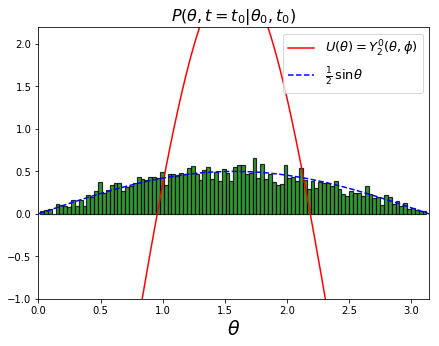

In [30]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
n,bins, rectangles = plt.hist(x1[0], bins = 100, normed = True, #
color = "g", alpha = 0.8, edgecolor='black', linewidth=1.2)
fig.canvas.draw()
plt.xlabel(r"$\theta$", fontsize = 19)
#plt.ylabel(r"$P(\theta,t = t_0| \theta_0, t_0)$", fontsize = 18)
#plt.legend(loc = 1, fontsize = 14)
plt.title(r"$P(\theta,t = t_0| \theta_0, t_0)$", fontsize = 16)
plt.plot(xpot,ypot, color = "r", linestyle = "-", label = r"$U(\theta) = Y_{2}^{0}(\theta, \phi)$")
plt.plot(xpot, 0.5*np.sin(xpot), color = "b", linestyle = "--",label = r"$\frac{1}{2}\,\sin{\theta}$")
plt.ylim(-1,2.2)
plt.xlim(0,np.pi)
plt.legend(loc=1, fontsize = 13)
plt.savefig("Y20_Hist_Theta_t0", dpi = 150)
plt.show()

In [31]:
theta2 = np.linspace(0,np.pi,1000)
D = 1e-1
const = v0*2*D*np.sqrt(5./(16*np.pi))
p0_Y20 = (1./12300)*np.exp(const*(3*np.cos(theta2)**2 - 1))*np.sin(theta2)

### Here we have taken into account the field in transformed co-ordinates

In [32]:
D = 1e-1
np.sqrt(5./(16*np.pi))*5.0*np.sqrt(2*D)*4/(3.*D)

9.403159725795938

In [33]:
#U0 = 5.0*np.sqrt(2*D)

In [53]:
zint = 5.0*np.sqrt(2*D)*4*np.sin(xpot)**3/(3.*D)
p0_Y20_int = (1/0.0628306)*np.exp(-6*np.sqrt(5./(16*np.pi))*zint)*np.sin(theta2)

In [37]:
theta = np.linspace(0,np.pi,1000)

In [38]:
5.0*np.sqrt(2*D)*4/(3.*D)*6*np.sqrt(5./(16*np.pi))

56.41895835477563

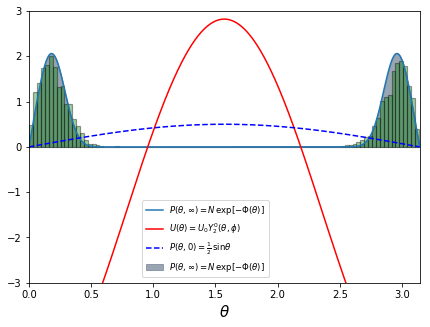

In [44]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
n,bins, rectangles = plt.hist(x1[-1], bins = 100, normed = True, #
color = "g", alpha = 0.38, edgecolor='black', linewidth=1.2)
fig.canvas.draw()
plt.plot(theta,p0_Y20_int, label = r'$P(\theta, \infty) = N\,\exp{[-\Phi(\theta)]}$')
plt.fill_between(theta, p0_Y20_int ,y2 = 0, color = '#778899', alpha = .750, label=r'$P(\theta, \infty) = N \,\exp{[-\Phi(\theta)]}$')
plt.xlabel(r"$\theta$", fontsize = 15)
#plt.ylabel(r"$P(\theta,t = t_0| \theta_0, t_0)$", fontsize = 18)
#plt.legend(loc = 1, fontsize = 14)
#plt.title(r"$P(\theta,t = t_0| \theta_0, t_0)$", fontsize = 15)
plt.plot(xpot,ypot, color = "r", linestyle = "-", label = r"$U(\theta) = U_0 Y_{2}^{0}(\theta, \phi)$")
plt.plot(xpot, 0.5*np.sin(xpot), color = "b", linestyle = "--",label = r"$P(\theta,0) = \frac{1}{2}\,\sin{\theta}$")
#plt.plot(theta, p0_Y20, 'b', label = r'$P(\theta, \infty) = N\,\exp{[-\Phi(\theta)]}$')
plt.ylim(-3,3)
plt.xlim(0,np.pi)
plt.legend(loc=(.29, .02), fontsize = 8.5)
plt.savefig("Y20_Hist_Theta_tinfty", dpi = 250)
plt.show()

## Fokker-Planck Equation transformation

In [47]:
coef_Y20 = 2*v0*np.sqrt(5./(16*np.pi))/D
zint = 3*np.cos(theta)**2 - 1

In [48]:
p0_Y20_int = (1/4.266071e10)*np.exp(coef_Y20*zint)*np.sin(theta)

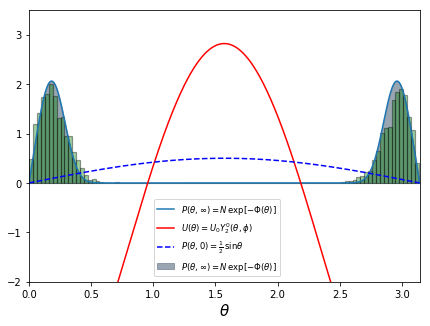

In [54]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
n,bins, rectangles = plt.hist(x1[-1], bins = 100, normed = True, #
color = "g", alpha = 0.38, edgecolor='black', linewidth=1.2)
fig.canvas.draw()
plt.plot(theta,p0_Y20_int, label = r'$P(\theta, \infty) = N\,\exp{[-\Phi(\theta)]}$')
plt.fill_between(theta, p0_Y20_int ,y2 = 0, color = '#778899', alpha = .750, label=r'$P(\theta, \infty) = N \,\exp{[-\Phi(\theta)]}$')
plt.xlabel(r"$\theta$", fontsize = 15)
#plt.ylabel(r"$P(\theta,t = t_0| \theta_0, t_0)$", fontsize = 18)
#plt.legend(loc = 1, fontsize = 14)
#plt.title(r"$P(\theta,t = t_0| \theta_0, t_0)$", fontsize = 15)
plt.plot(xpot,ypot, color = "r", linestyle = "-", label = r"$U(\theta) = U_0 Y_{2}^{0}(\theta, \phi)$")
plt.plot(xpot, 0.5*np.sin(xpot), color = "b", linestyle = "--",label = r"$P(\theta,0) = \frac{1}{2}\,\sin{\theta}$")
#plt.plot(theta, p0_Y20, 'b', label = r'$P(\theta, \infty) = N\,\exp{[-\Phi(\theta)]}$')
plt.ylim(-2,3.5)
plt.xlim(0,np.pi)
plt.legend(loc=(.32, .02), fontsize = 8.5)
plt.savefig("Y20_Hist_Theta_tinfty", dpi = 250)
plt.show()

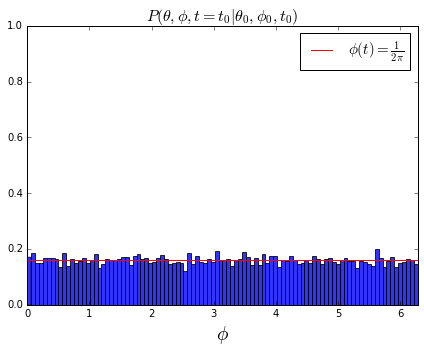

In [55]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
n,bins, rectangles = plt.hist(x2[0], bins = 100, normed = True, #
color = "b", alpha = 0.8)
fig.canvas.draw()
plt.plot(np.linspace(0,2*np.pi,100), (1./(2*np.pi))*np.ones(len(np.linspace(0,2*np.pi,100))), color = "r",#
label = r"$\phi(t) = \frac{1}{2\pi}$")
plt.xlabel(r"$\phi$", fontsize = 19)
plt.title(r"$P(\theta, \phi,t = t_0| \theta_0, \phi_0, t_0)$", fontsize = 16)
plt.ylim(0,1)
plt.xlim(0,2*np.pi)
plt.legend(loc = 1, fontsize = 15)
plt.savefig("Y20_Hist_Phi_t0", dpi = 150)
plt.show()

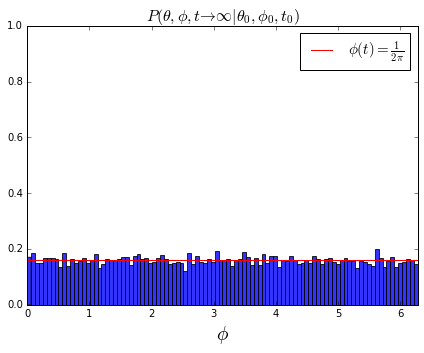

In [56]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
n,bins, rectangles = plt.hist(x2[0], bins = 100, normed = True, #
color = "b", alpha = 0.8)
fig.canvas.draw()
plt.plot(np.linspace(0,2*np.pi,100), (1./(2*np.pi))*np.ones(len(np.linspace(0,2*np.pi,100))), color = "r", #
label = r"$\phi(t) = \frac{1}{2\pi}$")
plt.xlabel(r"$\phi$", fontsize = 19)
plt.title(r"$P(\theta, \phi,t \to \infty | \theta_0, \phi_0, t_0)$", fontsize = 16)
plt.ylim(0,1)
plt.xlim(0,2*np.pi)
plt.legend(loc = 1, fontsize = 15)
plt.savefig("Y20_Hist_Phi_tinfty", dpi = 150)
plt.show()

In [57]:
tiempo = 0
dt = np.log(2)*1e-3
Nt = 5000
tiempos = [tiempo]
for i in range(Nt):
    tiempo = tiempo + dt
    tiempos.append(tiempo)
tiempos = np.array(tiempos)

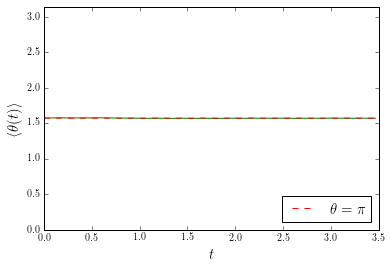

In [59]:
plt.rc('text', usetex=True)
plt.plot(tiempos, x3, color = 'g')
plt.plot(tiempos, np.pi/2*np.ones(len(tiempos)), color = "r", linestyle = "--", label = r"$\theta = \pi$")
#plt.plot(tiempos, (2.8)*np.ones(len(tiempos)), color = "k", linestyle = "--", label = r"$\theta(t \to \infty)$")
#plt.plot(tiempos[:5800], np.arccos(np.exp(-14*D*np.array(tiempos[:5800]))))
#plt.plot(tiempos[:5800], np.pi/2*np.ones(len(tiempos[:5800])), color = 'r')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylim(0,np.pi)
plt.ylabel(r'$\langle \theta(t) \rangle$', fontsize = 15)
plt.legend(loc = 4, fontsize = 15)
plt.savefig("Y20_Mean_Theta_t", dpi = 150)

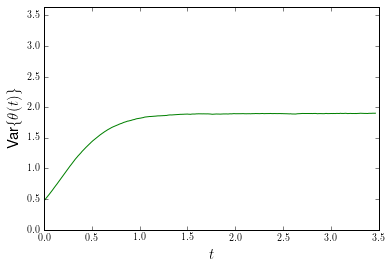

In [60]:
plt.rc('text', usetex=True)
plt.plot(tiempos, x5, color = 'g')
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$\mbox{Var}\{\theta(t)\}$', fontsize = 15)
plt.ylim(0,np.pi + 0.5)
plt.savefig("Y20_Var_Theta_t", dpi = 150)

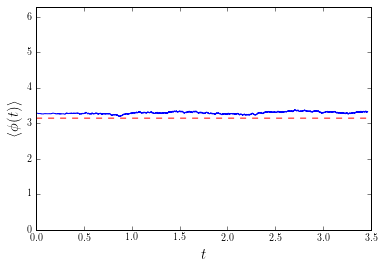

In [61]:
plt.rc('text', usetex=True)
plt.plot(tiempos, x6, color =  'b')
plt.plot(tiempos, np.pi*np.ones(len(tiempos)), color = "r", linestyle = "--")
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$$\langle \phi(t) \rangle$$', fontsize = 15)
plt.ylim(0,2*np.pi)
plt.savefig("Y20_Mean_Phi_t", dpi = 150)

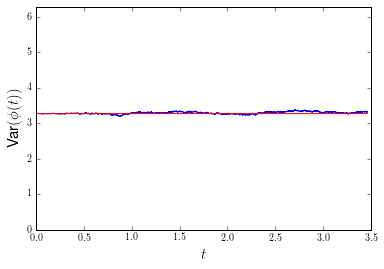

In [62]:
plt.rc('text', usetex=True)
plt.plot(tiempos, x6 , color = 'b')
plt.plot(tiempos, np.sqrt((13/12.)*(np.pi**2))*np.ones(len(tiempos)), color = "r", label = r"$$")
plt.xlabel(r'$t$', fontsize = 15)
plt.ylabel(r'$$\mbox{Var}(\phi(t))$$', fontsize = 15)
plt.ylim(0,2*np.pi)
plt.savefig("Y20_Var_Phi_t", dpi = 150)